
### Exercise 1: Social Network Connections (BFS - Shortest Path)

**Real-World Scenario:** In social networks like LinkedIn or Facebook, we often want to find the shortest connection path between two people - this is the "degrees of separation" problem. BFS is perfect for this because it finds the shortest path in unweighted graphs.

**Problem:** Given a social network where people are nodes and friendships are edges, find the shortest path (minimum number of connections) between two specific people.

**Your Task:** Complete the BFS implementation to find the shortest path from person A to person B. The code below sets up a small social network and visualizes it. You need to implement the BFS algorithm to find the path.

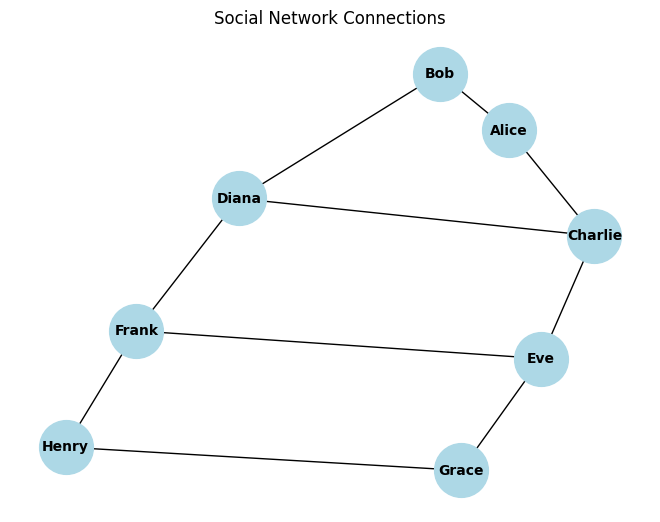

Shortest path from Alice to Henry: Alice -> Bob -> Diana -> Frank -> Henry
Degrees of separation: 4


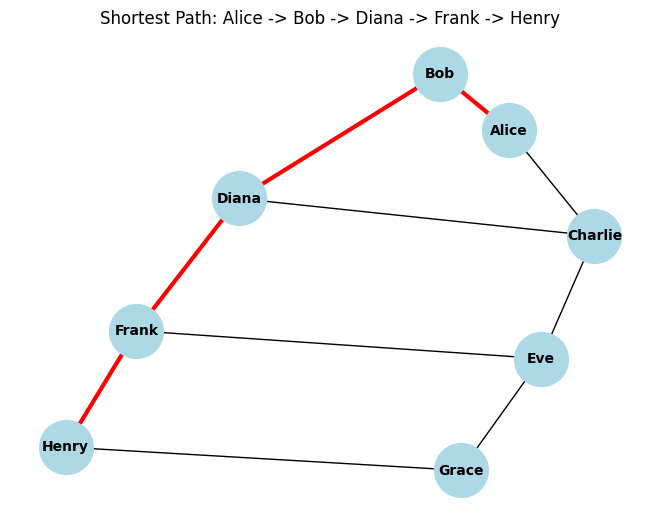

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# Create a social network graph
social_network = nx.Graph()
people = ['Alice', 'Bob', 'Charlie', 'Diana', 'Eve', 'Frank', 'Grace', 'Henry']
social_network.add_nodes_from(people)

# Add friendships (edges)
friendships = [
    ('Alice', 'Bob'), ('Alice', 'Charlie'), ('Bob', 'Diana'), 
    ('Charlie', 'Diana'), ('Charlie', 'Eve'), ('Diana', 'Frank'),
    ('Eve', 'Frank'), ('Eve', 'Grace'), ('Frank', 'Henry'), ('Grace', 'Henry')
]
social_network.add_edges_from(friendships)

# Visualize the social network
pos = nx.spring_layout(social_network, seed=42)
nx.draw(social_network, pos, with_labels=True, node_color='lightblue', 
        node_size=1500, font_size=10, font_weight='bold')
plt.title("Social Network Connections")
plt.show()

def find_shortest_path_bfs(graph, start, end):
    """
    Find the shortest path between start and end using BFS.
    Returns the path as a list of nodes, or None if no path exists.
    """
    # TODO: Implement BFS to find shortest path
    # Hint: Use a queue and keep track of parent nodes to reconstruct the path
    
    # Initialize data structures
    visited = set()
    queue = deque([start])
    visited.add(start)
    
    # Dictionary to keep track of parent nodes for path reconstruction
    parent = {start: None}
    
    while queue:
        current = queue.popleft()
        
        if current == end:
            # Reconstruct path
            path = []
            while current is not None:
                path.append(current)
                current = parent[current]
            path.reverse()
            return path

        # TODO: Add unvisited neighbors to queue and update parent

        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
                parent[neighbor]=current
        
    return None  # No path found

# Test the function
start_person = 'Alice'
end_person = 'Henry'
path = find_shortest_path_bfs(social_network, start_person, end_person)

if path:
    print(f"Shortest path from {start_person} to {end_person}: {' -> '.join(path)}")
    print(f"Degrees of separation: {len(path) - 1}")
    
    # Visualize the path
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw(social_network, pos, with_labels=True, node_color='lightblue', 
            node_size=1500, font_size=10, font_weight='bold')
    nx.draw_networkx_edges(social_network, pos, edgelist=path_edges, 
                          edge_color='red', width=3)
    plt.title(f"Shortest Path: {' -> '.join(path)}")
    plt.show()
else:
    print(f"No connection found between {start_person} and {end_person}")

### Exercise 2: Maze Navigation (DFS - Path Finding)

**Real-World Scenario:** Robots navigating warehouses, autonomous vehicles, or game characters often need to find paths through mazes or obstacle courses. DFS can be used to explore all possible paths until finding a solution.

**Problem:** Given a maze represented as a grid where 0s are open paths and 1s are walls, find if there's a path from the start position to the end position using DFS.

**Your Task:** Complete the DFS implementation to navigate through the maze. The code below creates a maze grid and visualizes it. You need to implement DFS to find a path from start to end.

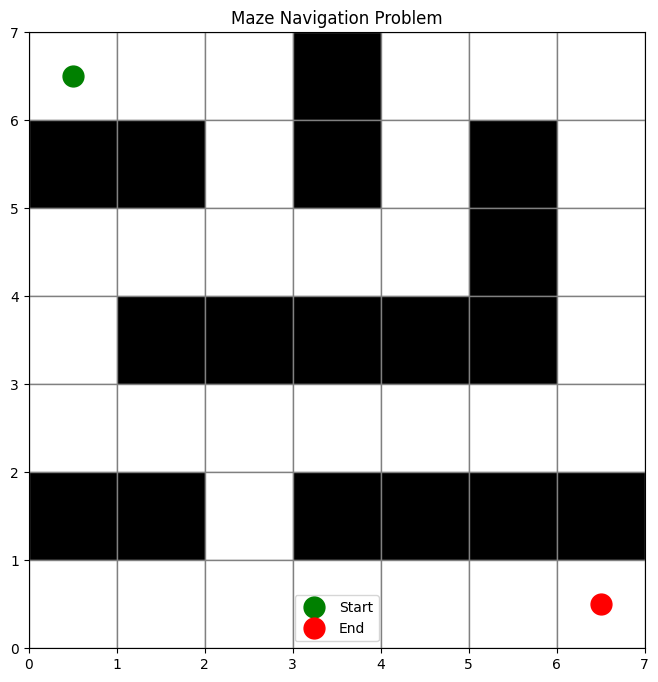

Path found! Length: 17 steps
Path coordinates: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (5, 2), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


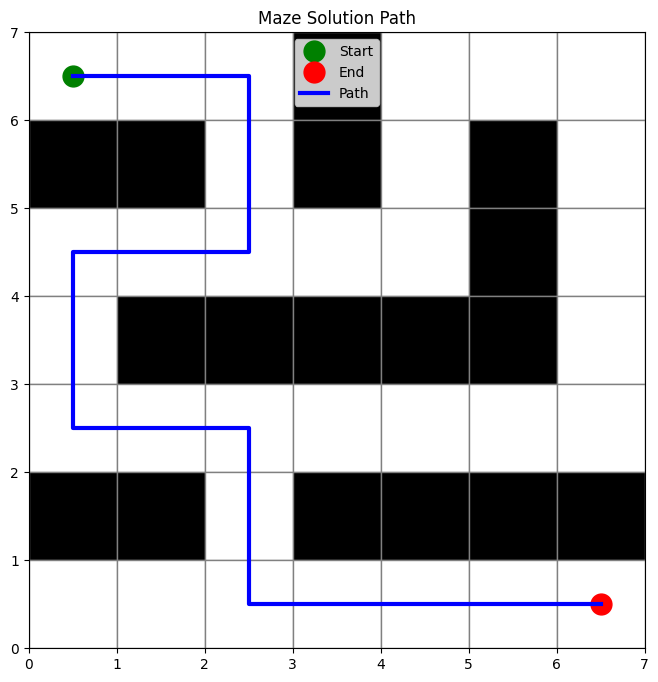

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Create a maze as a grid (0 = open, 1 = wall)
maze = np.array([
    [0, 0, 0, 1, 0, 0, 0],
    [1, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0]
])

# Convert maze to graph
def maze_to_graph(maze):
    rows, cols = maze.shape
    G = nx.Graph()
    
    for i in range(rows):
        for j in range(cols):
            if maze[i, j] == 0:  # Open cell
                G.add_node((i, j))
                # Add edges to adjacent open cells
                for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                    ni, nj = i + di, j + dj
                    if 0 <= ni < rows and 0 <= nj < cols and maze[ni, nj] == 0:
                        G.add_edge((i, j), (ni, nj))
    
    return G

maze_graph = maze_to_graph(maze)
start = (0, 0)  # Top-left corner
end = (6, 6)    # Bottom-right corner

# Visualize the maze
plt.figure(figsize=(8, 8))
rows, cols = maze.shape

# Draw the maze grid
for i in range(rows):
    for j in range(cols):
        color = 'white' if maze[i, j] == 0 else 'black'
        plt.fill([j, j+1, j+1, j], [rows-1-i, rows-1-i, rows-i, rows-i], color=color, edgecolor='gray')

# Mark start and end
plt.plot([0.5], [rows-0.5], 'go', markersize=15, label='Start')  # Start at (0,0)
plt.plot([cols-0.5], [0.5], 'ro', markersize=15, label='End')    # End at (6,6)

plt.xlim(0, cols)
plt.ylim(0, rows)
plt.gca().set_aspect('equal')
plt.title("Maze Navigation Problem")
plt.legend()
plt.show()

def find_path_dfs(graph, start, end):
    """
    Find a path from start to end using DFS.
    Returns the path as a list of positions, or None if no path exists.
    """
    # TODO: Implement DFS to find a path through the maze
    # Hint: Use recursion or a stack, keep track of visited cells
    
    visited = set()
    path = []
    
    def dfs(current):
        visited.add(current)
        path.append(current)
        
        if current == end:
            return True
        
        # TODO: Explore neighbors recursively
        # If neighbor not visited and is adjacent (already handled by graph), recurse
        for neighbhor in graph.neighbors(current):
            if neighbhor not in visited:
               if dfs(neighbhor):
                   return True
        # If no path found from this branch, backtrack
        path.pop()
        return False
    
    if dfs(start):
        return path
    else:
        return None

# Test the function
path = find_path_dfs(maze_graph, start, end)

if path:
    print(f"Path found! Length: {len(path)} steps")
    print("Path coordinates:", path)
    
    # Visualize the solution path
    plt.figure(figsize=(8, 8))
    
    # Draw the maze
    for i in range(rows):
        for j in range(cols):
            color = 'white' if maze[i, j] == 0 else 'black'
            plt.fill([j, j+1, j+1, j], [rows-1-i, rows-1-i, rows-i, rows-i], color=color, edgecolor='gray')
    
    # Mark start and end
    plt.plot([0.5], [rows-0.5], 'go', markersize=15, label='Start')
    plt.plot([cols-0.5], [0.5], 'ro', markersize=15, label='End')
    
    # Draw the path
    if path:
        path_x = [p[1] + 0.5 for p in path]
        path_y = [rows - 1 - p[0] + 0.5 for p in path]
        plt.plot(path_x, path_y, 'b-', linewidth=3, label='Path')
    
    plt.xlim(0, cols)
    plt.ylim(0, rows)
    plt.gca().set_aspect('equal')
    plt.title("Maze Solution Path")
    plt.legend()
    plt.show()
else:
    print("No path found through the maze!")